In [1]:
!mkdir data

In [2]:
!unzip "/content/IOC.zip" -d "/content/data" 

Archive:  /content/IOC.zip
  inflating: /content/data/31-08-2000-TO-30-08-2001IOCALLN.csv  
  inflating: /content/data/31-08-2001-TO-30-08-2002IOCALLN.csv  
  inflating: /content/data/31-08-2002-TO-30-08-2003IOCALLN.csv  
  inflating: /content/data/31-08-2003-TO-30-08-2004IOCALLN.csv  
  inflating: /content/data/31-08-2004-TO-30-08-2005IOCALLN.csv  
  inflating: /content/data/31-08-2005-TO-30-08-2006IOCALLN.csv  
  inflating: /content/data/31-08-2006-TO-30-08-2007IOCALLN.csv  
  inflating: /content/data/31-08-2007-TO-30-08-2008IOCALLN.csv  
  inflating: /content/data/31-08-2008-TO-30-08-2009IOCALLN.csv  
  inflating: /content/data/31-08-2009-TO-30-08-2010IOCALLN.csv  
  inflating: /content/data/31-08-2010-TO-30-08-2011IOCALLN.csv  
  inflating: /content/data/31-08-2011-TO-30-08-2012IOCALLN.csv  
  inflating: /content/data/31-08-2012-TO-30-08-2013IOCALLN.csv  
  inflating: /content/data/31-08-2013-TO-30-08-2014IOCALLN.csv  
  inflating: /content/data/31-08-2014-TO-30-08-2015IOCALLN.csv 

In [3]:
import pandas as pd
import glob
import os

In [4]:
files = os.path.join("/content/data/", "*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files at a particular location...
     Symbol Series         Date  Prev Close  Open Price  High Price  \
0       IOC     EQ  31-Aug-2016      573.55      576.95      579.95   
1       IOC     EQ  01-Sep-2016      575.40      580.00      582.30   
2       IOC     EQ  02-Sep-2016      575.65      568.60      576.00   
3       IOC     EQ  06-Sep-2016      573.45      575.95      578.00   
4       IOC     EQ  07-Sep-2016      573.20      573.95      577.10   
...     ...    ...          ...         ...         ...         ...   
5460    IOC     EQ  22-Aug-2014      368.75      370.55      373.50   
5461    IOC     EQ  25-Aug-2014      362.30      362.60      365.90   
5462    IOC     EQ  26-Aug-2014      357.80      357.90      361.35   
5463    IOC     EQ  27-Aug-2014      352.45      352.95      357.30   
5464    IOC     EQ  28-Aug-2014      355.40      355.35      363.30   

      Low Price  Last Price  Close Price  Average Price  \
0        572.40   

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.index = df['Date']

In [7]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
Date,,,,,,,,,,,,,
2016-08-31,IOC,EQ,2016-08-31,573.55,576.95,579.95,572.40,575.5,575.40,576.62,3211499,1.851819e+09,78052
2016-09-01,IOC,EQ,2016-09-01,575.40,580.00,582.30,571.50,577.0,575.65,577.27,1775824,1.025121e+09,36352
2016-09-02,IOC,EQ,2016-09-02,575.65,568.60,576.00,565.20,574.0,573.45,571.46,1468848,8.393952e+08,42234
2016-09-06,IOC,EQ,2016-09-06,573.45,575.95,578.00,571.25,573.8,573.20,574.36,1611774,9.257332e+08,33057
2016-09-07,IOC,EQ,2016-09-07,573.20,573.95,577.10,566.00,567.5,567.55,569.98,1712103,9.758719e+08,31435


In [8]:
column_lst = list(df.columns)
column_lst.remove("Average Price")

In [9]:
df_new = df.drop(column_lst, axis=1)

In [10]:
df_new.head()

,Average Price
Date,
2016-08-31,576.62
2016-09-01,577.27
2016-09-02,571.46
2016-09-06,574.36
2016-09-07,569.98


In [11]:
df_new['Date'] = df_new.index

In [12]:
df_new.head()

,Average Price,Date
Date,,
2016-08-31,576.62,2016-08-31
2016-09-01,577.27,2016-09-01
2016-09-02,571.46,2016-09-02
2016-09-06,574.36,2016-09-06
2016-09-07,569.98,2016-09-07


In [13]:
df_new = df_new.drop(["Date"], axis=1)

In [24]:
df_new = df_new.sort_values(by=['Date'])

In [15]:
import matplotlib.pyplot as plt

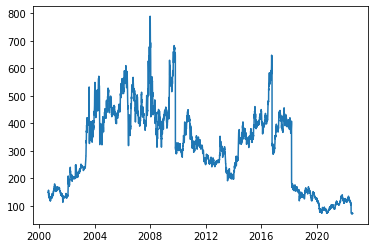

In [25]:
plt.plot(df_new)

In [ ]:
## df.date.dt.month
df_new['Day'] = df_new.index.day
df_new['Month'] = df_new.index.month
df_new['Year'] = df_new.index.year
df_new['Date of week'] = df_new.index.day_of_week

In [ ]:
df_new

,Average Price,Day,Month,Year,Date of week
Date,,,,,
2004-08-31,407.71,31,8,2004,1
2004-09-01,410.03,1,9,2004,2
2004-09-02,409.13,2,9,2004,3
2004-09-03,403.60,3,9,2004,4
2004-09-06,405.79,6,9,2004,0
...,...,...,...,...,...
2013-08-26,214.36,26,8,2013,0
2013-08-27,210.58,27,8,2013,1
2013-08-28,201.29,28,8,2013,2


In [ ]:
df_new.corr()['Average Price'].abs().sort_values(ascending=False)

Average Price    1.000000
Year             0.364426
Day              0.011979
Month            0.004897
Date of week     0.003822
Name: Average Price, dtype: float64

In [ ]:
import numpy as np

In [ ]:
def preprocess_numeric_column_data(data):
  columns = data.columns
  for i in columns:
    if data.dtypes[i] == np.object:
      print("Cannot process object data")
      return

  ## if skew is 0.5 and -0.5 i.e its normal distribution and use scaler else normalise
  scale_list = []
  normalise_list = []
  data_skew = data.skew()

  for i in columns:
    if data_skew[i] >= -0.5 and data_skew[i] <= 0.5:
      scale_list.append(i)
    else:
      normalise_list.append(i)
  return (scale_list, normalise_list)

In [ ]:
scale_list, normalize_list = preprocess_numeric_column_data(df_new)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
scale_list

['Average Price', 'Day', 'Month', 'Year', 'Date of week']

In [ ]:
from sklearn import preprocessing

In [ ]:
scale_list.remove('Average Price')

In [ ]:
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(df_new[scale_list])
df_new[scale_list] = standard_scaler.transform(df_new[scale_list])

In [ ]:
y_scaler = preprocessing.StandardScaler()
y_scaler.fit(df_new['Average Price'].values.reshape(-1, 1))
df_new['Average Price'] = y_scaler.transform(df_new['Average Price'].values.reshape(-1, 1))

In [ ]:
df_new.head()

,Average Price,Day,Month,Year,Date of week
Date,,,,,
2000-08-31,-1.132455,1.731849,0.432277,-1.748664,0.698042
2000-09-04,-1.148791,-1.340615,0.722605,-1.748664,-1.408031
2000-09-05,-1.104462,-1.226820,0.722605,-1.748664,-0.706007
2000-09-06,-1.077656,-1.113025,0.722605,-1.748664,-0.003982
2000-09-07,-1.165475,-0.999230,0.722605,-1.748664,0.698042


In [ ]:
X_train = df_new[:-365].drop(columns = ['Average Price']).values
y_train = df_new[:-365].drop(columns = ['Day','Month','Year','Date of week']).values
X_test = df_new[-365:-40].drop(columns = ['Average Price']).values
y_test = df_new[-365:-40].drop(columns = ['Day','Month','Year','Date of week']).values

## XGBOOST

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_xgb = XGBRegressor(learning_rate = 0.01, n_estimators = 1000, max_depth = 10)
model_xgb.fit(X_train, y_train)

[16:59:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, max_depth=10, n_estimators=1000)

In [ ]:
y_hat = model_xgb.predict(X_test)

In [ ]:
y_hat = y_scaler.inverse_transform(y_hat.reshape(-1, 1))
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))

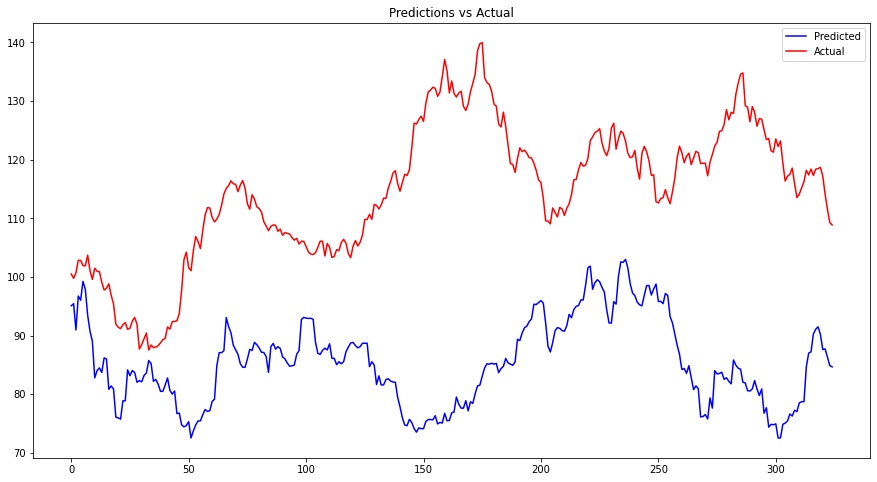

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(y_hat, label='Predicted', color="blue")
plt.plot(y_test, label='Actual', color="red")
plt.title("Predictions vs Actual")
plt.legend()

In [ ]:
mdape = np.median(np.abs(y_hat - y_test)/np.abs(y_test))
acc = (1-mdape)*100
print("Median Absolute Percentage Error: ",mdape)
print("Accuracy: ", acc)

Median Absolute Percentage Error:  0.22613796578931336
Accuracy:  77.38620342106867


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(random_state=0)

In [ ]:
y_hat = regressor.predict(X_test)

In [ ]:
y_hat = y_scaler.inverse_transform(y_hat.reshape(-1, 1))

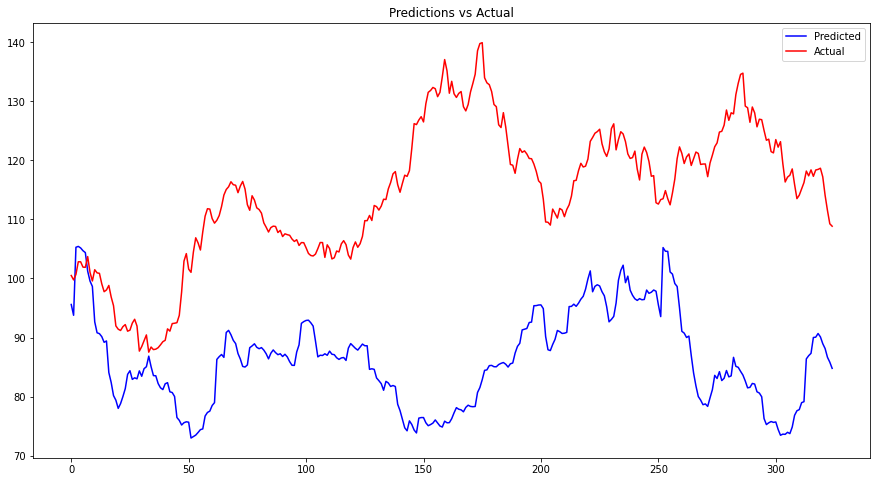

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(y_hat, label='Predicted', color="blue")
plt.plot(y_test, label='Actual', color="red")
plt.title("Predictions vs Actual")
plt.legend()

In [ ]:
mdape = np.median(np.abs(y_hat - y_test)/np.abs(y_test))
acc = (1-mdape)*100
print("Median Absolute Percentage Error: ",mdape)
print("Accuracy: ", acc)

Median Absolute Percentage Error:  0.22259494758549647
Accuracy:  77.74050524145035


## Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_hat = regressor.predict(X_test)

In [ ]:
y_hat = y_scaler.inverse_transform(y_hat.reshape(-1, 1))

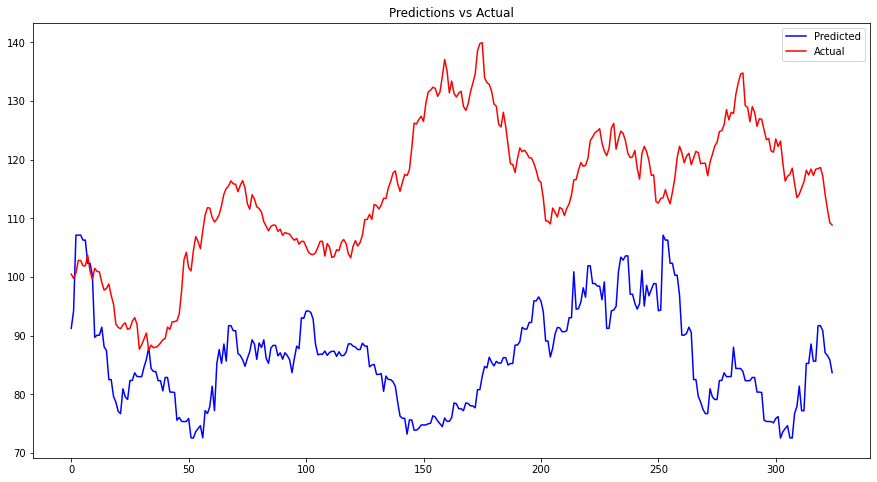

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(y_hat, label='Predicted', color="blue")
plt.plot(y_test, label='Actual', color="red")
plt.title("Predictions vs Actual")
plt.legend()

In [ ]:
mdape = np.median(np.abs(y_hat - y_test)/np.abs(y_test))
acc = (1-mdape)*100
print("Median Absolute Percentage Error: ",mdape)
print("Accuracy: ", acc)

Median Absolute Percentage Error:  0.2530098669321992
Accuracy:  74.69901330678009


## Extra Trees Regressor


In [ ]:
regressor = ExtraTreesRegressor()
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesRegressor()

In [ ]:
y_hat = regressor.predict(X_test)

In [ ]:
y_hat = y_scaler.inverse_transform(y_hat.reshape(-1, 1))

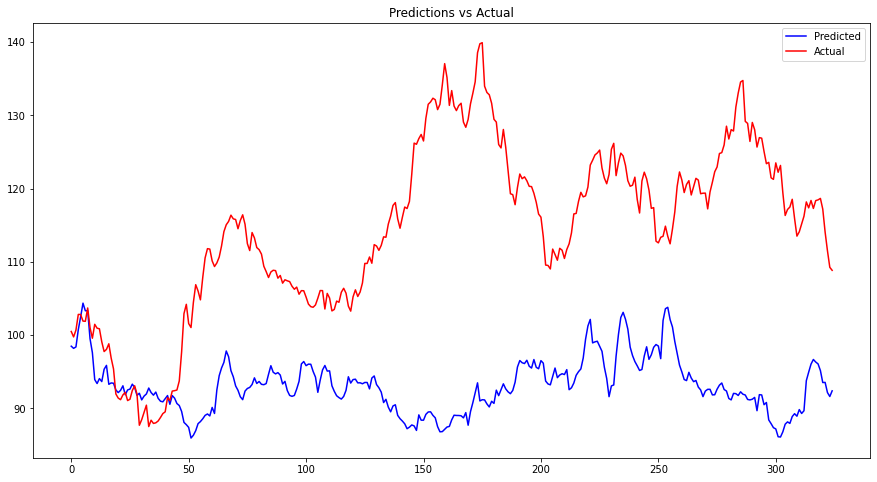

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(y_hat, label='Predicted', color="blue")
plt.plot(y_test, label='Actual', color="red")
plt.title("Predictions vs Actual")
plt.legend()

In [ ]:
mdape = np.median(np.abs(y_hat - y_test)/np.abs(y_test))
acc = (1-mdape)*100
print("Median Absolute Percentage Error: ",mdape)
print("Accuracy: ", acc)

Median Absolute Percentage Error:  0.19221274763135082
Accuracy:  80.77872523686491


## Extras

In [ ]:
y_hat = y_hat.reshape(len(y_hat))

In [ ]:
y_test = y_test.reshape(len(y_test))

In [ ]:
df_rf = pd.DataFrame()

In [ ]:
df_rf['True'] = y_test

In [ ]:
df_rf['predicted'] = y_hat

In [ ]:
df_rf

,True,predicted
0,100.50,95.5942
1,99.76,93.7656
2,100.69,105.2850
3,102.83,105.4307
4,102.82,105.1706
...,...,...
320,117.21,88.9571
321,114.08,88.1311
322,111.52,86.6569
323,109.26,85.8271


In [ ]:
df_rf['diff'] = abs(df_rf['predicted']-df_rf['True'])

In [ ]:
df_rf

,True,predicted,diff
0,100.50,95.5942,4.9058
1,99.76,93.7656,5.9944
2,100.69,105.2850,4.5950
3,102.83,105.4307,2.6007
4,102.82,105.1706,2.3506
...,...,...,...
320,117.21,88.9571,28.2529
321,114.08,88.1311,25.9489
322,111.52,86.6569,24.8631
323,109.26,85.8271,23.4329


In [ ]:
max(df_rf['diff'])

61.235199999999935